# Model Training Module

Now that we have our cleaned dataset, we can finally start training our models to predict real estate price.

Importing important libraries


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import specified linear algorithms
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import specified ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [64]:
df = pd.read_csv('datas/training_data.csv')

In [65]:
# drop duplicates and unwanted columns
df.drop_duplicates()
df = df.drop(df.columns[0], axis=1)
df = df.drop(columns= ['хаяг'])
df = df.drop(columns= ['PricePerArea'])
df.head()


үнэ  Тагт  Гараж  Барилгын давхар  Талбай  Хэдэн давхарт  \
0 141.400     1  False               16  50.500              3   
1 180.000     1  False               12  50.000              7   
2 145.000     1  False               12  50.320              8   
3 160.000     0  False                6  60.000              6   
4 210.000     1  False               16  49.500              3   

   Лизингээр авах боломж  Цонхны тоо  Барилгын явц  Нас  floor-ratio  \
0                  False           2         False    0        0.188   
1                  False           2          True   10        0.583   
2                  False           3          True    8        0.667   
3                   True           4          True   16        1.000   
4                  False           2          True    9        0.188   

   Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0       False        True                False               False   
1       False        True                False               False   
2       False        True                False               False   
3       False        True                False                True   
4       False        True                False               False   

   Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                 True              False                      False   
1                False              False                      False   
2                 True              False                      False   
3                False              False                      False   
4                False              False                      False   

   Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                 False               False                 False   
1                 False               False                  True   
2                 False               False                 False   
3                 False               False                 False   
4                  True               False                 False   

   Хаалга-Бусад  Хаалга-Бүргэд  Хаалга-Төмөр  Шал-Бусад  Шал-Паркет  \
0         False           True         False      False        True   
1         False           True         False      False        True   
2         False           True         False      False        True   
3         False           True         False      False        True   
4         False          False          True      False        True   

   Category-High  Category-Low  Category-Medium  totalfloorlog  agelog  \
0          False          True            False          2.773   0.693   
1          False          True            False          2.485   2.485   
2          False         False             True          2.485   2.303   
3          False         False             True          1.792   2.890   
4          False         False             True          2.773   2.398   

   Specific_Location_Encoded  
0                     39.000  
1                     46.000  
2                    189.000  
3                     13.000  
4                    179.000

In [66]:
df['үнэ'].describe()


count   5741.000
mean     268.769
std      152.372
min       45.000
25%      155.000
50%      220.000
75%      350.000
max      825.000
Name: үнэ, dtype: float64

In [67]:
df['Нас'].describe()

count   5741.000
mean       5.766
std        5.725
min        0.000
25%        1.000
50%        4.000
75%       10.000
max       25.000
Name: Нас, dtype: float64

In [68]:
df['Талбай'].describe()

count   5741.000
mean      71.923
std       27.832
min       18.000
25%       50.530
50%       66.000
75%       90.000
max      150.000
Name: Талбай, dtype: float64

In [69]:
df.columns

Index(['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар', 'Талбай', 'Хэдэн давхарт',
       'Лизингээр авах боломж', 'Цонхны тоо', 'Барилгын явц', 'Нас',
       'floor-ratio', 'Цонх-Бусад', 'Цонх-Вакум', 'Дүүрэг-УБ  Багануур',
       'Дүүрэг-УБ  Баянгол', 'Дүүрэг-УБ  Баянзүрх', 'Дүүрэг-УБ  Налайх',
       'Дүүрэг-УБ  Сонгинохайрхан', 'Дүүрэг-УБ  Сүхбаатар',
       'Дүүрэг-УБ  Хан-Уул', 'Дүүрэг-УБ  Чингэлтэй', 'Хаалга-Бусад',
       'Хаалга-Бүргэд', 'Хаалга-Төмөр', 'Шал-Бусад', 'Шал-Паркет',
       'Category-High', 'Category-Low', 'Category-Medium', 'totalfloorlog',
       'agelog', 'Specific_Location_Encoded'],
      dtype='object')

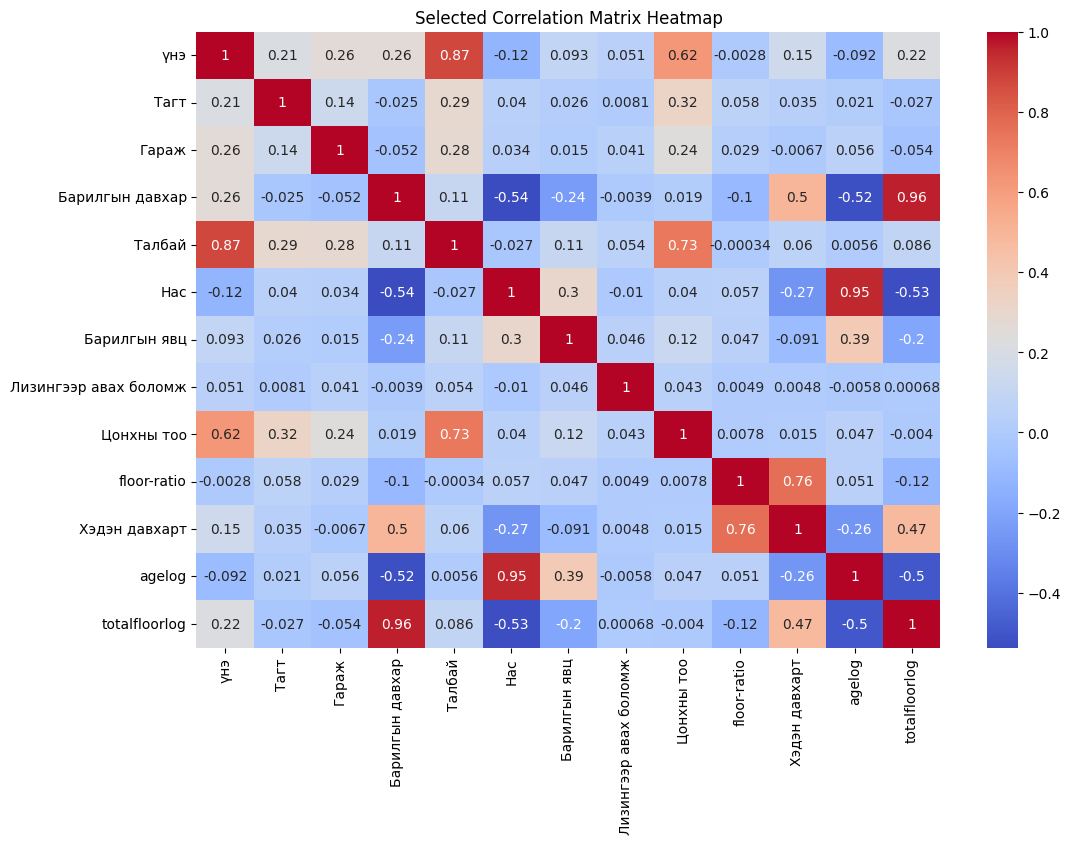

In [70]:
correlation_matrix = df.corr()

# Select specific columns and rows for the heatmap
selected_columns = ['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар',
                     'Талбай', 'Нас',
                       'Барилгын явц', 'Лизингээр авах боломж', 'Цонхны тоо', 'floor-ratio', 'Хэдэн давхарт', 'agelog', 'totalfloorlog']
correlation_matrix_selected = correlation_matrix.loc[selected_columns, selected_columns]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Selected Correlation Matrix Heatmap')
plt.show()

In [71]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your dataframe and it contains only numerical features

# If your dataframe has both numerical and categorical variables, you need to separate them first and only use the numerical ones.
numerical_features = df.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns = ['үнэ'])
numerical_features = numerical_features.drop(columns = ['floor-ratio', 'totalfloorlog', 'agelog'])


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)



                     Feature    VIF
0                       Тагт  6.361
1            Барилгын давхар  9.768
2                     Талбай 17.021
3              Хэдэн давхарт  4.734
4                 Цонхны тоо 16.648
5                        Нас  1.986
6  Specific_Location_Encoded  3.404


Since number of windows has a high VIF let's try discarding it and training our model


In [72]:
df = df.drop(columns = ['Цонхны тоо'])

## Split Dataset for training and testing.

In [73]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import lightgbm as lgb
import catboost as cb


In [74]:
df[df['Нас'] == 0].shape


(1427, 31)

In [75]:
df

үнэ  Тагт  Гараж  Барилгын давхар  Талбай  Хэдэн давхарт  \
0    141.400     1  False               16  50.500              3   
1    180.000     1  False               12  50.000              7   
2    145.000     1  False               12  50.320              8   
3    160.000     0  False                6  60.000              6   
4    210.000     1  False               16  49.500              3   
...      ...   ...    ...              ...     ...            ...   
5736 610.000     1   True               16 122.000             11   
5737  90.000     1  False                9  38.000              8   
5738 150.000     0  False               12  41.000              6   
5739 218.700     1   True               16  73.000              9   
5740 236.600     2   True               16  91.080             15   

      Лизингээр авах боломж  Барилгын явц  Нас  floor-ratio  Цонх-Бусад  \
0                     False         False    0        0.188       False   
1                     False          True   10        0.583       False   
2                     False          True    8        0.667       False   
3                      True          True   16        1.000       False   
4                     False          True    9        0.188       False   
...                     ...           ...  ...          ...         ...   
5736                  False          True    4        0.688       False   
5737                  False          True    7        0.889       False   
5738                  False          True    5        0.500       False   
5739                   True         False    0        0.562       False   
5740                  False          True    1        0.938       False   

      Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0           True                False               False   
1           True                False               False   
2           True                False               False   
3           True                False                True   
4           True                False               False   
...          ...                  ...                 ...   
5736        True                False               False   
5737        True                False               False   
5738        True                False               False   
5739        True                False                True   
5740        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                    True              False                      False   
1                   False              False                      False   
2                    True              False                      False   
3                   False              False                      False   
4                   False              False                      False   
...                   ...                ...                        ...   
5736                 True              False                      False   
5737                False              False                       True   
5738                 True              False                      False   
5739                False              False                      False   
5740                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                    False               False                 False   
1                    False               False                  True   
2                    False               False                 False   
3                    False               False                 False   
4                     True               False                 False   
...                    ...                 ...                   ...   
5736                 False               False                 False   
5737                 False               False                 False 

In [76]:
# object for our target variable

y = df['үнэ']


# seperate object for our input features

X = df.drop(['үнэ', 'Барилгын давхар', 'Нас', 'Category-High', 'Category-Medium', 'Category-Low'], axis=1)

In [77]:
X

Тагт  Гараж  Талбай  Хэдэн давхарт  Лизингээр авах боломж  Барилгын явц  \
0        1  False  50.500              3                  False         False   
1        1  False  50.000              7                  False          True   
2        1  False  50.320              8                  False          True   
3        0  False  60.000              6                   True          True   
4        1  False  49.500              3                  False          True   
...    ...    ...     ...            ...                    ...           ...   
5736     1   True 122.000             11                  False          True   
5737     1  False  38.000              8                  False          True   
5738     0  False  41.000              6                  False          True   
5739     1   True  73.000              9                   True         False   
5740     2   True  91.080             15                  False          True   

      floor-ratio  Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  \
0           0.188       False        True                False   
1           0.583       False        True                False   
2           0.667       False        True                False   
3           1.000       False        True                False   
4           0.188       False        True                False   
...           ...         ...         ...                  ...   
5736        0.688       False        True                False   
5737        0.889       False        True                False   
5738        0.500       False        True                False   
5739        0.562       False        True                False   
5740        0.938       False        True                False   

      Дүүрэг-УБ  Баянгол  Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  \
0                  False                 True              False   
1                  False                False              False   
2                  False                 True              False   
3                   True                False              False   
4                  False                False              False   
...                  ...                  ...                ...   
5736               False                 True              False   
5737               False                False              False   
5738               False                 True              False   
5739                True                False              False   
5740               False                False              False   

      Дүүрэг-УБ  Сонгинохайрхан  Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  \
0                         False                 False               False   
1                         False                 False               False   
2                         False                 False               False   
3                         False                 False               False   
4                         False                  True               False   
...                         ...                   ...                 ...   
5736                      False                 False               False   
5737                       True                 False               False   
5738                      False                 False               False   
5739                      False                 False               False   
5740                      False                 False                True   

      Дүүрэг-УБ  Чингэлтэй  Хаалга-Бусад  Хаалга-Бүргэд  Хаалга-Төмөр  \
0                    False         False           True         False   
1                     True         False           True         False   
2                    False         False           True         False   
3                    False         False           True         False   
4                    False         False          False          True   
...                    ...           ...            ...     

In [78]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)

# verify length of each set
len(X_train), len(X_test), len(y_train), len(y_test)

(4592, 1149, 4592, 1149)

## Models with default parameters



In [79]:
X_test.describe()

Тагт   Талбай  Хэдэн давхарт  floor-ratio  totalfloorlog   agelog  \
count 1149.000 1149.000       1149.000     1149.000       1149.000 1149.000   
mean     1.042   72.711          7.372        0.573          2.497    1.724   
std      0.463   28.022          4.648        0.287          0.400    0.799   
min      0.000   18.000          1.000        0.059          0.693    0.693   
25%      1.000   51.450          4.000        0.333          2.303    0.693   
50%      1.000   66.520          7.000        0.565          2.565    1.792   
75%      1.000   90.000         10.000        0.833          2.773    2.398   
max      3.000  150.000         25.000        1.000          3.219    3.296   

       Specific_Location_Encoded  
count                   1149.000  
mean                     120.237  
std                       81.653  
min                        0.000  
25%                       41.000  
50%                      114.000  
75%                      198.000  
max                      248.000

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Mean Absolute Error =  51.00940245245258
Training Accuracy =  0.7965196142209344
Test Accuracy     =  0.8045724015984758


### Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 123)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Mean Absolute Error =  35.95428768030172
Training Accuracy =  0.9997005104369255
Test Accuracy     =  0.8255497172413568


### Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 12)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Mean Absolute Error =  30.001157786216208
Training Accuracy =  0.9870703119029278
Test Accuracy     =  0.9071144839680509


### Default Gradient Boosting 

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# Evaluate the performance
y_pred_train = gb.predict(X_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

training_r2 = r2_score(y_train, y_pred_train)
training_mae = mean_absolute_error(y_train, y_pred_train)
training_mse = mean_squared_error(y_train, y_pred_train)
training_rmse = np.sqrt(training_mse)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R squared value: ', r2)
print(f'Training R squared value: {training_r2}')
print(f'Training Mean Absolute Error: {training_mae}')
print(f'Training Mean Squared Error: {training_mse}')
print(f'Training Root Mean Squared Error: {training_rmse}')


Mean Absolute Error: 38.57095497505354
Mean Squared Error: 2968.615945977349
Root Mean Squared Error: 54.485006616291685
R squared value:  0.8762474110141641
Training R squared value: 0.8897003401154016
Training Mean Absolute Error: 35.77156350738327
Training Mean Squared Error: 2538.8081994364825
Training Root Mean Squared Error: 50.38658749544845


## HyperParameter Tuning with GridSearch

In [86]:
# lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}   

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}

# elastic net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# random forest hyperparameters

rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200, 400],
    'randomforestregressor__max_features': [None, 'sqrt', 0.33],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__max_depth': [None, 2, 4, 6]
}
# gradient boost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [500, 750, 1000],
    'gradientboostingregressor__learning_rate' : [0.001, 0.005, 0.1],
    'gradientboostingregressor__max_depth' : [4, 5, 6],
}

In [87]:
hyperparameters = {
    'rf' : rf_hyperparameters, 
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
fitted_models = {}

for name, pipeline in pipelines.items():
    # create cross-validation object 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')

    # fite model on X_train, y_train
    model.fit(X_train, y_train)
    
    # store model in dictionary
    fitted_models[name] = model

    # print message after model has been fitted
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [90]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [91]:
# display the average R^2 score for each model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso -4733.874920043762
ridge -4734.297127336967
enet -4737.211944640336
rf -2191.1819304272494
gb -1879.4697346781236


In [92]:
from sklearn.metrics import r2_score

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
from sklearn.metrics import accuracy_score

for name, model in fitted_models.items():
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    print(name)
    print('--------')
    print('R^2:', r2_score(y_test, pred))
    range_of_target = np.max(y_test) - np.min(y_test)
    relative_mae = mean_absolute_error(y_test,pred) / range_of_target

    training_r2 = r2_score(y_train, train_pred)
    
    print('MAE:', mean_absolute_error(y_test, pred))
    print('Relative MAE:', relative_mae)
    print('Training R2 :', training_r2)
    print('Training MAE :', mean_absolute_error(y_train, train_pred))

lasso
--------
R^2: 0.8043972005481539
MAE: 51.01877195374158
Relative MAE: 0.06651730372065395
Training R2 : 0.7965025907614203
Training MAE : 51.52050170612321
ridge
--------
R^2: 0.8044662109937053
MAE: 51.02702523367827
Relative MAE: 0.06652806418993255
Training R2 : 0.7965108775356229
Training MAE : 51.536727163393664
enet
--------
R^2: 0.8038400416350985
MAE: 51.09728622801571
Relative MAE: 0.06661966913691748
Training R2 : 0.7963022783371765
Training MAE : 51.55494339712572
rf
--------
R^2: 0.9089480117973898
MAE: 29.637277411032763
Relative MAE: 0.038640518136939715
Training R2 : 0.9875772779039717
Training MAE : 10.929255857109924
gb
--------
R^2: 0.9256578777297566
MAE: 27.244158253600137
Relative MAE: 0.035520414932985835
Training R2 : 0.9949966357320885
Training MAE : 7.5170435709965755


*So far Random Forest is the best model. So let's see residuals distribution and also prediction and test correlation.*

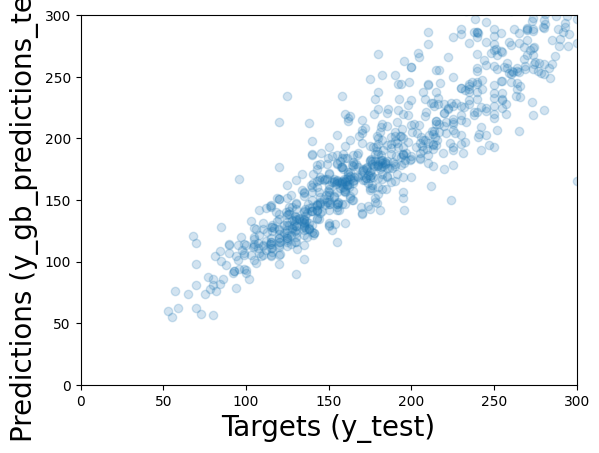

In [95]:
gbmodel = None
for name, model in fitted_models.items():
    if name == 'gb':
        gbmodel = model
        break
pred = gbmodel.predict(X_test)
plt.scatter(y_test, pred, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_gb_predictions_test)', size=20)
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

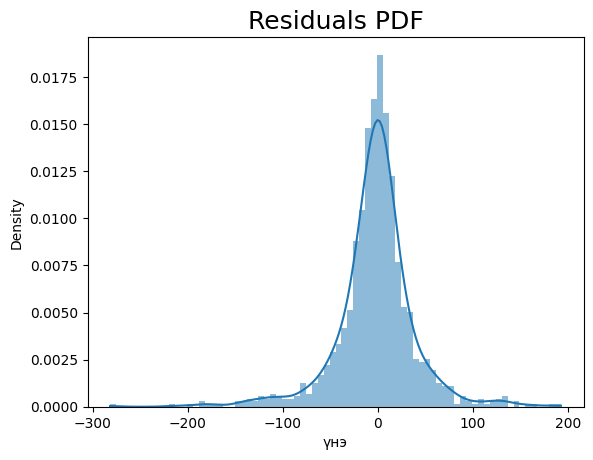

In [96]:
sns.histplot(y_test - pred, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [97]:

# df_predictions = pd.DataFrame({
#     'Actual': y_test,
#     'Талбай': X_test['Талбай'],
#     'Нас': X_test['Нас'],
#     ''})

# Create the pair plot
sns.pairplot(df,)
plt.show()

In [98]:
X_test

Тагт  Гараж  Талбай  Хэдэн давхарт  Лизингээр авах боломж  Барилгын явц  \
3781     1   True  48.700              5                   True          True   
5232     1  False  98.100              5                  False          True   
1745     2  False 120.000              5                  False          True   
3752     1  False  37.000             14                  False          True   
3168     1  False  77.500              4                  False          True   
...    ...    ...     ...            ...                    ...           ...   
4747     1  False 104.750             11                  False          True   
3780     1   True  49.000              3                   True          True   
1022     1  False 104.750             10                   True          True   
4508     1  False  75.100              9                   True          True   
5374     2  False 112.640              1                   True          True   

      floor-ratio  Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  \
3781        0.294       False        True                False   
5232        0.556       False        True                False   
1745        1.000       False        True                False   
3752        0.933       False        True                False   
3168        0.250       False        True                False   
...           ...         ...         ...                  ...   
4747        0.917       False        True                False   
3780        0.176       False        True                False   
1022        0.625       False        True                False   
4508        0.562       False        True                False   
5374        0.083       False        True                False   

      Дүүрэг-УБ  Баянгол  Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  \
3781               False                False              False   
5232                True                False              False   
1745               False                False              False   
3752               False                False              False   
3168                True                False              False   
...                  ...                  ...                ...   
4747               False                False              False   
3780               False                False              False   
1022               False                False              False   
4508               False                False              False   
5374               False                False              False   

      Дүүрэг-УБ  Сонгинохайрхан  Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  \
3781                      False                  True               False   
5232                      False                 False               False   
1745                      False                 False                True   
3752                       True                 False               False   
3168                      False                 False               False   
...                         ...                   ...                 ...   
4747                      False                 False               False   
3780                      False                  True               False   
1022                      False                 False               False   
4508                      False                 False                True   
5374                      False                  True               False   

      Дүүрэг-УБ  Чингэлтэй  Хаалга-Бусад  Хаалга-Бүргэд  Хаалга-Төмөр  \
3781                 False         False           True         False   
5232                 False         False           True         False   
1745                 False         False          False          True   
3752                 False         False           True         False   
3168                 False         False           True         False   
...                    ...           ...            ...     

In [99]:
df_pf = pd.DataFrame(pred, columns=['Prediction'])

y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop = True)

df_pf['Target'] = y_test

df_pf['Residual'] =df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
cdf_pf = pd.concat([df_pf, X_test], axis=1)
cdf_pf




Prediction  Target  Residual  Difference%  Тагт  Гараж  Талбай  \
0        191.062 213.306    22.244       10.428     1   True  48.700   
1        259.191 245.000   -14.191        5.792     1  False  98.100   
2        381.406 360.000   -21.406        5.946     2  False 120.000   
3        101.361 105.000     3.639        3.466     1  False  37.000   
4        366.502 333.250   -33.252        9.978     1  False  77.500   
...          ...     ...       ...          ...   ...    ...     ...   
1144     466.938 480.000    13.062        2.721     1  False 104.750   
1145     168.351 195.020    26.669       13.675     1   True  49.000   
1146     486.137 460.000   -26.137        5.682     1  False 104.750   
1147     285.579 240.320   -45.259       18.833     1  False  75.100   
1148     403.669 281.600  -122.069       43.348     2  False 112.640   

      Хэдэн давхарт  Лизингээр авах боломж  Барилгын явц  floor-ratio  \
0                 5                   True          True        0.294   
1                 5                  False          True        0.556   
2                 5                  False          True        1.000   
3                14                  False          True        0.933   
4                 4                  False          True        0.250   
...             ...                    ...           ...          ...   
1144             11                  False          True        0.917   
1145              3                   True          True        0.176   
1146             10                   True          True        0.625   
1147              9                   True          True        0.562   
1148              1                   True          True        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0          False        True                False               False   
1          False        True                False                True   
2          False        True                False               False   
3          False        True                False               False   
4          False        True                False                True   
...          ...         ...                  ...                 ...   
1144       False        True                False               False   
1145       False        True                False               False   
1146       False        True                False               False   
1147       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                   False              False                      False   
1                   False              False                      False   
2                   False              False                      False   
3                   False              False                       True   
4                   False              False                      False   
...                   ...                ...                        ...   
1144                False              False                      False   
1145                False              False                      False   
1146                False              False                      False   
1147                False              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                     True               False                 False   
1                    False               False                 False   
2                    False                True                 False   
3                    False               False                 False   
4                    False               False                 False   
...                    ...                 ...        

In [100]:
df_pf.describe()

Prediction   Target  Residual  Difference%
count    1149.000 1149.000  1149.000     1149.000
mean      273.541  271.128    -2.414       10.822
std       150.949  154.949    42.179       11.862
min        55.057   53.000  -281.607        0.019
25%       162.590  155.840   -17.959        3.140
50%       224.558  222.000    -0.581        7.274
75%       356.655  350.000    15.072       14.111
max       900.332  820.000   192.671      100.574

In [101]:
cdf_pf[(cdf_pf['Difference%']) > 10]


Prediction  Target  Residual  Difference%  Тагт  Гараж  Талбай  \
0        191.062 213.306    22.244       10.428     1   True  48.700   
7         90.026 130.000    39.974       30.749     1  False  32.000   
9        121.647 108.000   -13.647       12.637     1  False  49.000   
10       460.318 603.900   143.582       23.776     2   True 122.000   
12       104.301  94.000   -10.301       10.958     1  False  37.190   
...          ...     ...       ...          ...   ...    ...     ...   
1131     360.736 420.000    59.264       14.111     1  False  76.000   
1136     248.938 284.000    35.062       12.346     1  False  63.310   
1145     168.351 195.020    26.669       13.675     1   True  49.000   
1147     285.579 240.320   -45.259       18.833     1  False  75.100   
1148     403.669 281.600  -122.069       43.348     2  False 112.640   

      Хэдэн давхарт  Лизингээр авах боломж  Барилгын явц  floor-ratio  \
0                 5                   True          True        0.294   
7                 2                  False          True        0.333   
9                 1                  False          True        0.083   
10                1                   True          True        0.083   
12                7                  False          True        0.467   
...             ...                    ...           ...          ...   
1131             13                  False          True        0.812   
1136              7                  False          True        0.438   
1145              3                   True          True        0.176   
1147              9                   True          True        0.562   
1148              1                   True          True        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0          False        True                False               False   
7          False        True                False               False   
9          False        True                False               False   
10          True       False                False               False   
12         False        True                False               False   
...          ...         ...                  ...                 ...   
1131       False        True                False               False   
1136       False        True                False               False   
1145       False        True                False               False   
1147       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                   False              False                      False   
7                   False              False                      False   
9                   False              False                       True   
10                   True              False                      False   
12                   True              False                      False   
...                   ...                ...                        ...   
1131                 True              False                      False   
1136                False              False                      False   
1145                False              False                      False   
1147                False              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                     True               False                 False   
7                    False                True                 False   
9                    False               False                 False   
10                   False               False                 False   
12                   False               False                 False   
...                    ...                 ...        

In [102]:
cdf_pf[(cdf_pf['Difference%']) > 20]

Prediction  Target  Residual  Difference%  Тагт  Гараж  Талбай  \
7         90.026 130.000    39.974       30.749     1  False  32.000   
10       460.318 603.900   143.582       23.776     2   True 122.000   
26       441.638 590.000   148.362       25.146     2   True  93.000   
32       184.027 149.640   -34.387       22.980     1  False  51.600   
36        57.271  73.000    15.729       21.546     1  False  27.000   
...          ...     ...       ...          ...   ...    ...     ...   
1079     127.445 105.000   -22.445       21.376     1  False  41.690   
1086     223.577 186.000   -37.577       20.203     1  False  70.000   
1101     171.376 133.770   -37.606       28.112     1  False  51.450   
1103     165.814 130.000   -35.814       27.549     1   True  49.030   
1148     403.669 281.600  -122.069       43.348     2  False 112.640   

      Хэдэн давхарт  Лизингээр авах боломж  Барилгын явц  floor-ratio  \
7                 2                  False          True        0.333   
10                1                   True          True        0.083   
26                4                  False          True        0.667   
32                3                  False         False        0.188   
36                4                  False          True        0.800   
...             ...                    ...           ...          ...   
1079              4                  False         False        0.333   
1086             15                  False          True        0.938   
1101             10                  False         False        0.435   
1103              3                   True          True        0.188   
1148              1                   True          True        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
7          False        True                False               False   
10          True       False                False               False   
26         False        True                False               False   
32         False        True                False               False   
36         False        True                False               False   
...          ...         ...                  ...                 ...   
1079       False        True                False               False   
1086       False        True                False               False   
1101       False        True                False               False   
1103       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
7                   False              False                      False   
10                   True              False                      False   
26                  False              False                      False   
32                   True              False                      False   
36                  False              False                       True   
...                   ...                ...                        ...   
1079                False              False                      False   
1086                False              False                      False   
1101                 True              False                      False   
1103                 True              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
7                    False                True                 False   
10                   False               False                 False   
26                    True               False                 False   
32                   False               False                 False   
36                   False               False                 False   
...                    ...                 ...        

In [103]:
cdf_pf[(cdf_pf['Difference%']) > 50].shape

(16, 29)

## LGBM Regressor

In [104]:
from sklearn.model_selection import RandomizedSearchCV
import logging
# Set LightGBM logging level to WARNING
lgb_logger = logging.getLogger('lightgbm')
lgb_logger.setLevel(logging.WARNING)

lgbm = LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=1000,
              num_leaves=100, random_state=123, subsample=0.5)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 4592, number of used features: 23
[LightGBM] [Info] Start training from score 268.179409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=1000,
              num_leaves=100, random_state=123, subsample=0.5)

In [105]:
y_hat_lb_def = lgbm.predict(X_train)

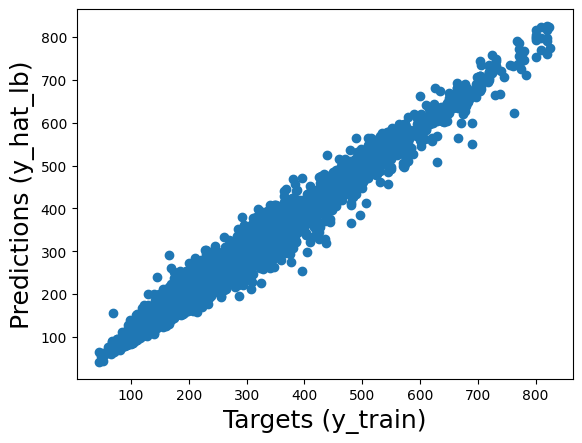

In [106]:
plt.scatter(y_train, y_hat_lb_def)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)

plt.show()

In [107]:
y_hat_test_lb_def=lgbm.predict(X_test)

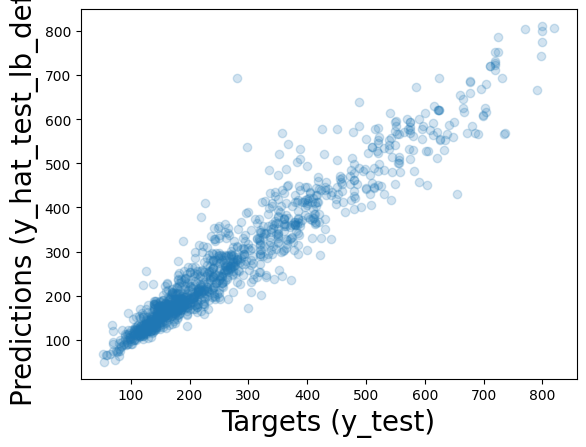

In [108]:
plt.scatter(y_test, y_hat_test_lb_def, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_hat_test_lb_def)', size=20)
plt.show()

In [109]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb_def, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb_def, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)))

r2_lb_def = r2_score (y_hat_test_lb_def, y_test)

print ('R-squared score', round (r2_lb_def,3))

Mean Absolute Error: 29.132331789514257
Mean Squared Error: 1963.8882158683236
Root Mean Squared Error: 44.31577840756409
R-squared score 0.913


So far the best model is Gradient Boosting algorithm so let's run more testing to see where our model is failing 
shapley, importance value, check for inconsistencies 


### Checking Shap plot for Gradient Boosting Model 

In [110]:
gbmodel

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.005,
                                                                      0.1],
                         'gradientboostingregressor__max_depth': [4, 5, 6],
                         'gradientboostingregressor__n_estimators': [500, 750,
                                                                     1000]},
             scoring='neg_mean_squared_error')

In [112]:
import shap

# Initialize the SHAP explainer
best_model = gbmodel.best_estimator_
gb_model = best_model.named_steps['gradientboostingregressor']

explainer = shap.TreeExplainer(gb_model)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

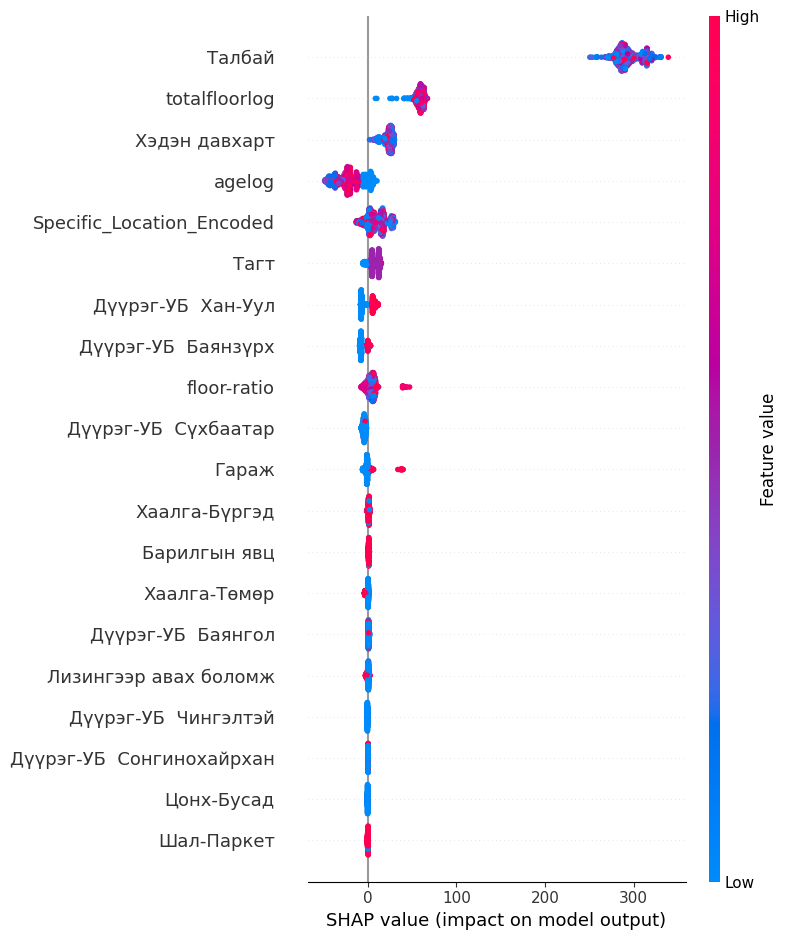

In [113]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

Gini Importance


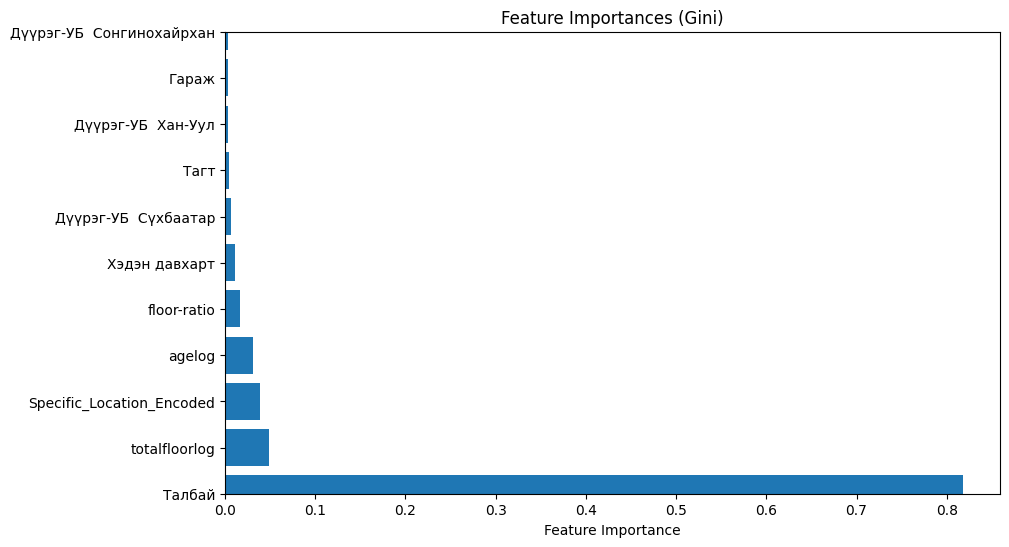

In [114]:
import matplotlib.pyplot as plt

importances = gb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.ylim(0, 10)
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Gini)')
plt.show()


Lastly Random Forest is the best model and here are the accuracy values of the model so far.

R^2: 0.9230262479062367\
MAE: 27.528263486254463\
Relative MAE: 0.03589082592732003